In [1]:
import os
# import drjit
gpu_num = 2 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
import pickle
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')
# tf.config.run_functions_eagerly(True)

from jammer.simulation_model import *
from jammer.utils import *
import jammer.simulation_model as sim
from tensorflow.python.keras.losses import MeanAbsoluteError, MeanSquaredError, BinaryCrossentropy

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 7.2771e-02 | 1.0000e+00 |     3494759 |    48024000 |         3000 |        3000 |       225.7 |reached max iter       
     -4.0 | 5.2699e-02 | 1.0000e+00 |     2530819 |    48024000 |         3000 |        3000 |       243.5 |reached max iter       
     -3.0 | 3.6460e-02 | 1.0000e+00 |     1750954 |    48024000 |         3000 |        3000 |       244.4 |reached max iter       
     -2.0 | 2.4253e-02 | 1.0000e+00 |     1164705 |    48024000 |         3000 |        3000 |       246.9 |reached max iter       
     -1.0 | 1.5351e-02 | 1.0000e+00 |      737200 |    48024000 |         3000 |        3000 |       247.2 |reached max iter       
      0.0 | 8.8508e-03 | 1.0000e+00 |      425052 |    48024000 |         3000 |     

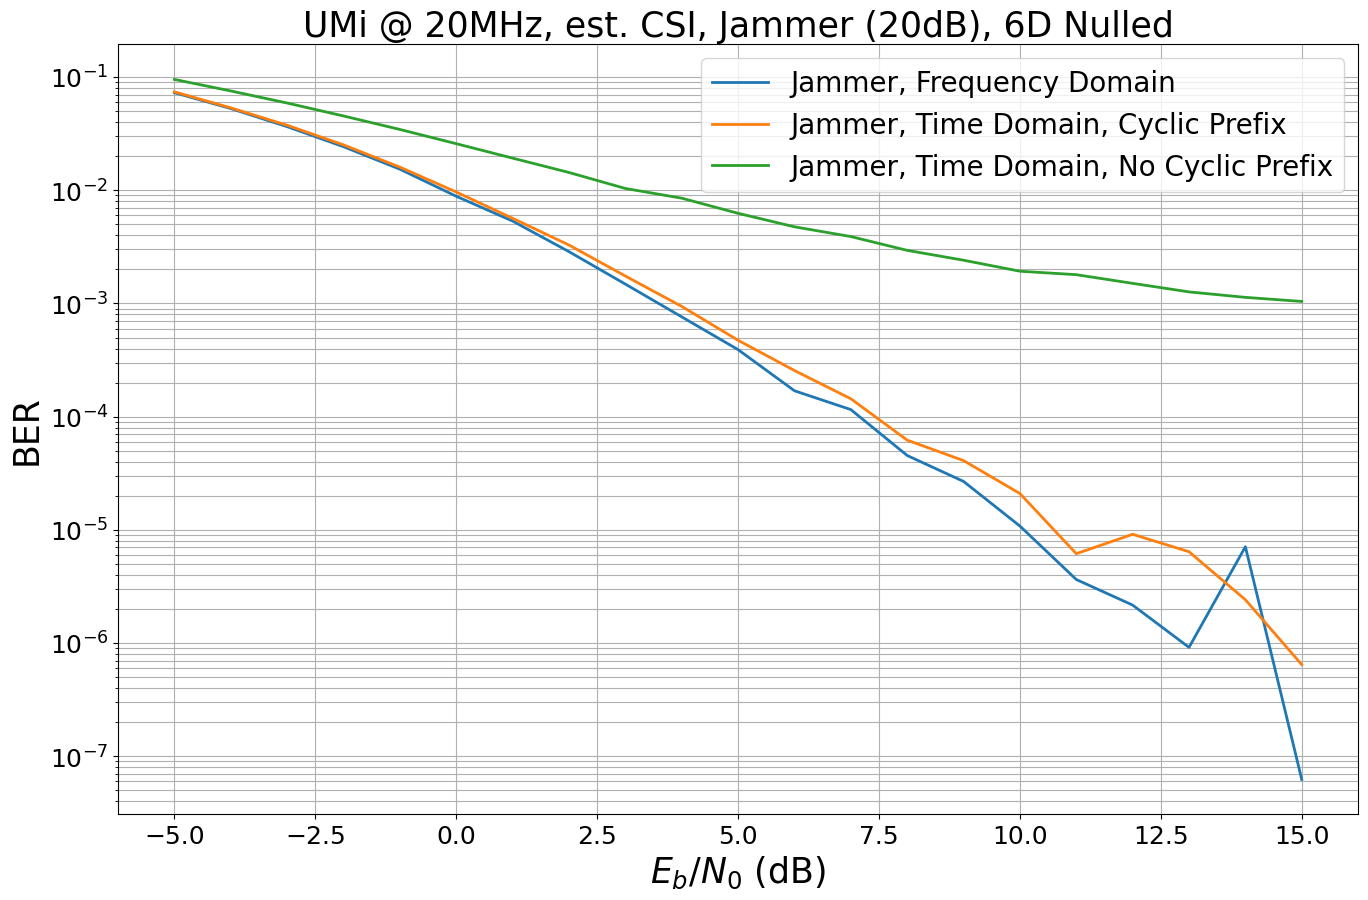

In [2]:
# here real est. CSI & NR compliant
ber_plots.reset()
model_parameters = {}
jammer_parameters = {}
model_parameters["jammer_parameters"] = jammer_parameters
model_parameters["num_ut"] = 6
model_parameters["perfect_csi"] = False
model_parameters["perfect_jammer_csi"] = False
model_parameters["num_silent_pilot_symbols"] = 6
model_parameters["jammer_present"] = True
model_parameters["jammer_power"] = db_to_linear(20.)
model_parameters["jammer_mitigation"] = "ian"
model_parameters["scenario"] = "umi"
#NR
model_parameters["fft_size"] = 667 # * 30kHz = 20MHz
model_parameters["cyclic_prefix_length"] = 47 # 667 * 144 / 2048
# model_parameters["jammer_mitigation_dimensionality"] = 3
sim.BATCH_SIZE = 1
# sim.MAX_MC_ITER = 70
# sim.ebno_dbs = np.linspace(-5., 15., 10)
sim.MAX_MC_ITER = 3000
sim.ebno_dbs = np.linspace(-5., 15., 21)

model = Model(**model_parameters)
simulate_model(model, "Jammer, Frequency Domain")

model_parameters["domain"] = "time"
jammer_parameters["send_cyclic_prefix"] = True
model = Model(**model_parameters)
simulate_model(model, "Jammer, Time Domain, Cyclic Prefix")

jammer_parameters["send_cyclic_prefix"] = False
model = Model(**model_parameters)
simulate_model(model, "Jammer, Time Domain, No Cyclic Prefix")

ber_plots.title = "UMi @ 20MHz, est. CSI, Jammer (20dB), 6D Nulled"
ber_plots()
with open("bers/time_pos_umi_nr_est.pickle", 'wb') as f:
    bers = pickle.dump(ber_plots, f)

In [3]:
# NR compliant (perf. CSI)
ber_plots.reset()
model_parameters = {}
jammer_parameters = {}
model_parameters["jammer_parameters"] = jammer_parameters
model_parameters["num_ut"] = 6
model_parameters["perfect_csi"] = True
model_parameters["perfect_jammer_csi"] = True
model_parameters["num_silent_pilot_symbols"] = 6
model_parameters["jammer_present"] = True
model_parameters["jammer_power"] = db_to_linear(20.)
model_parameters["jammer_mitigation"] = "ian"
model_parameters["scenario"] = "umi"
#NR
model_parameters["fft_size"] = 667 # * 30kHz = 20MHz
model_parameters["cyclic_prefix_length"] = 47 # 667 * 144 / 2048
# model_parameters["jammer_mitigation_dimensionality"] = 3
sim.BATCH_SIZE = 1
# sim.MAX_MC_ITER = 70
# sim.ebno_dbs = np.linspace(-5., 15., 10)
sim.MAX_MC_ITER = 3000
sim.ebno_dbs = np.linspace(-5., 15., 21)

model = Model(**model_parameters)
simulate_model(model, "Jammer, Frequency Domain")

model_parameters["domain"] = "time"
jammer_parameters["send_cyclic_prefix"] = True
model = Model(**model_parameters)
simulate_model(model, "Jammer, Time Domain, Cyclic Prefix")

jammer_parameters["send_cyclic_prefix"] = False
model = Model(**model_parameters)
simulate_model(model, "Jammer, Time Domain, No Cyclic Prefix")

ber_plots.title = "UMi @ 20MHz, perf. CSI, Jammer (20dB), 6D Nulled"
ber_plots()
with open("bers/time_pos_umi_nr.pickle", 'wb') as f:
    bers = pickle.dump(ber_plots, f)

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 8.3320e-03 | 1.0000e+00 |      400138 |    48024000 |         3000 |        3000 |       220.2 |reached max iter       
     -4.0 | 4.7565e-03 | 1.0000e+00 |      228426 |    48024000 |         3000 |        3000 |       205.1 |reached max iter       
     -3.0 | 2.4696e-03 | 1.0000e+00 |      118600 |    48024000 |         3000 |        3000 |       205.3 |reached max iter       
     -2.0 | 1.3187e-03 | 9.9633e-01 |       63328 |    48024000 |         2989 |        3000 |       207.4 |reached max iter       
     -1.0 | 6.7929e-04 | 9.6067e-01 |       32622 |    48024000 |         2882 |        3000 |       206.7 |reached max iter       
      0.0 | 3.2736e-04 | 8.0833e-01 |       15721 |    48024000 |         2425 |     